### Exercise 1: Basic Data Loading and Exploration

In this exercise, you'll work with a synthetic dataset about houses. You'll learn how to load data into a pandas DataFrame, perform basic exploratory data analysis (EDA), and create simple visualizations to understand the data better.

The dataset contains the following columns:
- 'area': House area in square feet (numeric)
- 'bedrooms': Number of bedrooms (numeric)
- 'age': Age of the house in years (numeric)
- 'neighborhood': Categorical feature representing different neighborhoods
- 'distance_to_city_center': Distance to city center in miles (numeric)
- 'price': House price in thousands of dollars (target variable)

Your tasks:
1. Load the generated data into a pandas DataFrame
2. Explore the basic properties of the dataset
3. Create visualizations to better understand the data
4. Analyze correlations between features


First, we'll create some data to process.

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

area = np.random.uniform(1000, 5000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
age = np.random.uniform(1, 50, n_samples)
neighborhood = np.random.choice(['A', 'B', 'C', 'D', 'E'], n_samples)
distance_to_city_center = np.random.exponential(scale=5, size=n_samples)

price = (
    10 * np.log(area) +
    5 * bedrooms -
    2 * age +
    np.where(neighborhood == 'A', 50, 0) +
    np.where(neighborhood == 'C', 30, 0) +
    np.where(neighborhood == 'E', 10, 0) +
    np.where(neighborhood == 'D', -20, 0) +
    np.where(neighborhood == 'B', -40, 0) -
    20 * np.log(distance_to_city_center + 1) +
    np.random.normal(0, 10, n_samples)
)

# Create DataFrame
df = pd.DataFrame({
    'area': area,
    'bedrooms': bedrooms,
    'age': age,
    'neighborhood': neighborhood,
    'distance_to_city_center': distance_to_city_center,
    'price': price
})

# Add some missing values

df.loc[np.random.choice(df.index, 50, replace=False), 'neighborhood'] = np.nan
df.loc[np.random.choice(df.index, 30, replace=False), 'bedrooms'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'age'] = np.nan


#### Step 1: Display basic information about the dataset (hint: use `.info()`)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     1000 non-null   float64
 1   bedrooms                 970 non-null    float64
 2   age                      980 non-null    float64
 3   neighborhood             950 non-null    object 
 4   distance_to_city_center  1000 non-null   float64
 5   price                    1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


#### Step 2: Display the dataframe 

In [23]:
df

,area,bedrooms,age,neighborhood,distance_to_city_center,price
0,2498.160475,4.0,25.277153,B,15.125273,-61.657557
1,4802.857226,3.0,19.931097,C,0.964840,79.914053
2,3927.975767,5.0,23.056097,NaN,4.193493,-11.083783
3,3394.633937,1.0,12.121270,NaN,4.329348,9.061742
4,1624.074562,5.0,44.580155,NaN,3.363042,49.280903
...,...,...,...,...,...,...
995,1366.328293,2.0,24.585335,D,16.854162,-47.713077
996,4669.254302,4.0,44.986059,C,2.500709,30.916394
997,1547.274524,5.0,34.043100,A,0.700435,41.363561
998,4800.949415,4.0,7.712954,E,5.569272,61.525617


#### Step 3: Calculate summary statistics (use `.describe()`)

In [24]:
df.describe()

,area,bedrooms,age,distance_to_city_center,price
count,1000.000000,970.000000,980.000000,1000.000000,1000.000000
mean,2961.026213,3.047423,25.701926,4.786029,20.052093
std,1168.549448,1.430112,14.297999,4.856130,48.934901
min,1018.528092,1.000000,1.009232,0.000154,-114.546204
25%,1943.893070,2.000000,12.865136,1.352034,-14.402742
50%,2987.229506,3.000000,26.558701,3.318686,22.709886
75%,3977.278352,4.000000,37.815854,6.524832,55.105175
max,4998.870693,5.000000,49.985976,38.617648,150.497437


#### Step 4: Create a histogram of the 'price' column

- Hint: Use plt.hist() or sns.histplot()

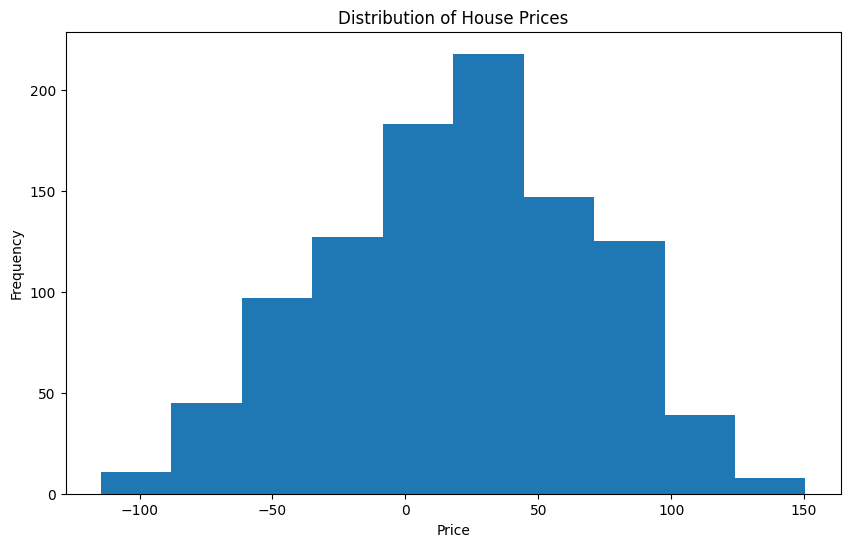

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'])
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#### Step 5: Create a scatter plot of 'area' vs 'price'

- Hint: Use plt.scatter() or sns.scatterplot()

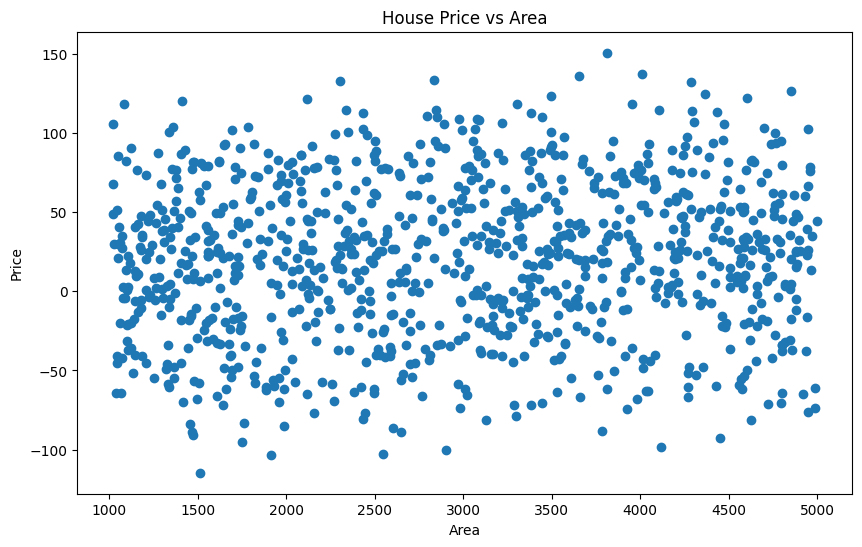

In [26]:

# TODO: 
plt.figure(figsize=(10, 6))
plt.scatter(df['area'],df['price'])
plt.title('House Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


#### Step 6:  Calculate and print the correlation between numeric columns

- Hint: Use df.corr() and focus on numeric columns only

In [28]:
import numpy as np
# TODO: 
# Select numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Get the correlation matrix
correlation_matrix = df[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                             area  bedrooms       age  \
area                     1.000000 -0.036209 -0.004771   
bedrooms                -0.036209  1.000000  0.002617   
age                     -0.004771  0.002617  1.000000   
distance_to_city_center  0.013125 -0.031614  0.051266   
price                    0.078197  0.152051 -0.596060   

                         distance_to_city_center     price  
area                                    0.013125  0.078197  
bedrooms                               -0.031614  0.152051  
age                                     0.051266 -0.596060  
distance_to_city_center                 1.000000 -0.356431  
price                                  -0.356431  1.000000  


#### Step 7: Create a heatmap of the correlation matrix

- Hint: use `sns.heatmap`

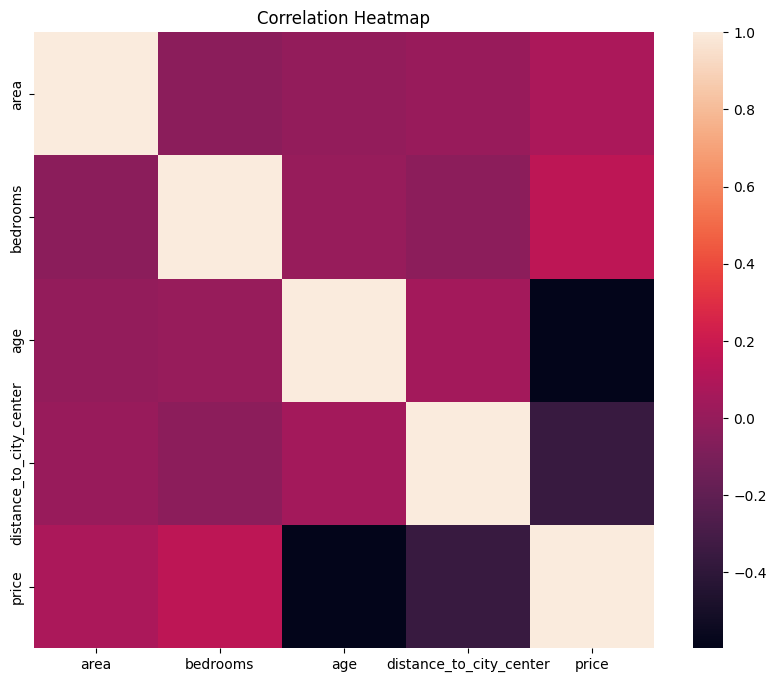

In [29]:

# Bonus: Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.title('Correlation Heatmap')
plt.show()

### Exercise 2: Handling Missing Values

In this exercise, you'll identify missing values, visualize them, and apply basic strategies to handle them.

Your tasks:
1. Identify missing values in the dataset
2. Visualize the extent of missing data
3. Apply simple strategies to handle missing values
4. Verify that all missing values have been addressed

#### Step 1: Check for missing values in each column

- Hint: Use df.isnull().sum()


In [30]:
# TODO: Check for missing values in each column
# Hint: Use df.isnull().sum()
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
area                        0
bedrooms                   30
age                        20
neighborhood               50
distance_to_city_center     0
price                       0
dtype: int64


#### Step 2: Calculate the percentage of missing values in each column

- Hint: Divide the missing value counts by the total number of rows and multiply by 100


Percentage of missing values in each column:
area                       0.0
bedrooms                   3.0
age                        2.0
neighborhood               5.0
distance_to_city_center    0.0
price                      0.0
dtype: float64


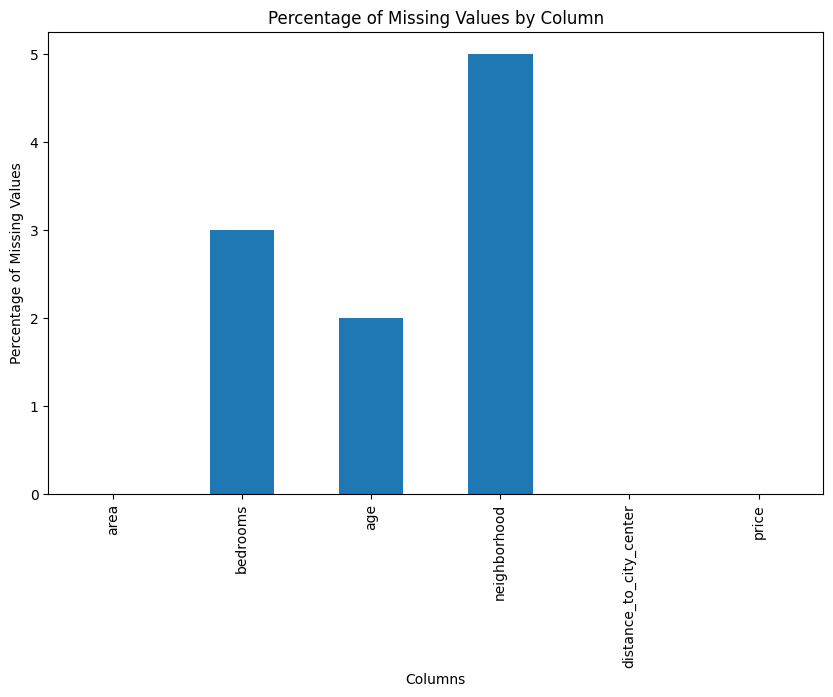

In [31]:

missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

#### Step 3: Handle missing values


Missing values after imputation:
area                       0
bedrooms                   0
age                        0
neighborhood               0
distance_to_city_center    0
price                      0
dtype: int64

Does the dataframe have any missing values? None


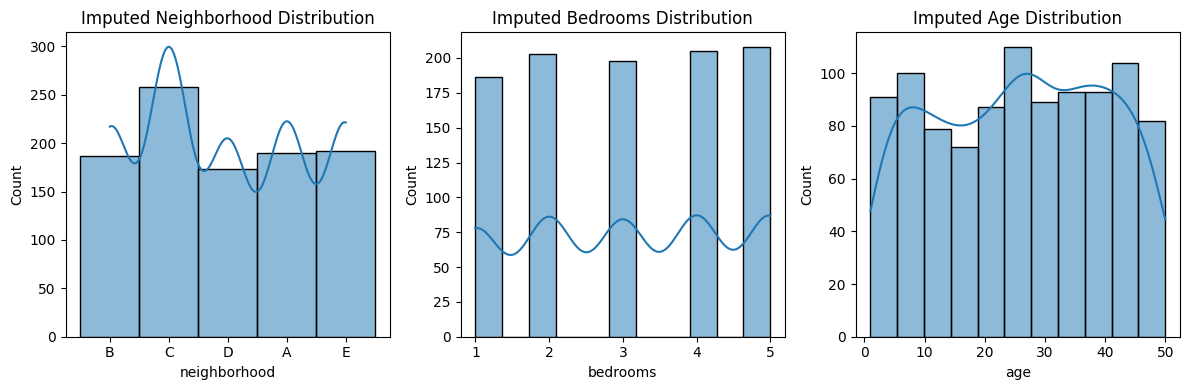

In [32]:
# Handle missing values using SimpleImputer
# For categorical data (neighborhood)
from sklearn.impute import SimpleImputer


# TODO: Create a SimpleImputer with strategy='most_frequent' for categorical data
cat_imputer = SimpleImputer(strategy="most_frequent")
df[['neighborhood']] = cat_imputer.fit_transform(df[['neighborhood']])

# For numeric data (bedrooms and age)
numeric_columns = ['bedrooms', 'age']


# TODO: Create a SimpleImputer with strategy='median' for numeric data
num_imputer = SimpleImputer(strategy="median")
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

# Verify that all missing values have been handled
print("\nMissing values after imputation:")
print(df.isnull().sum())

# TODO: Create a function to check if a dataframe has any missing values
def has_missing_values(dataframe):
    np.any(dataframe.isnull().sum() > 0)

# Test the function
print("\nDoes the dataframe have any missing values?", has_missing_values(df))

# Bonus: Compare imputed values with original distribution
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.histplot(data=df, x='neighborhood', kde=True)
plt.title('Imputed Neighborhood Distribution')

plt.subplot(132)
sns.histplot(data=df, x='bedrooms', kde=True)
plt.title('Imputed Bedrooms Distribution')

plt.subplot(133)
sns.histplot(data=df, x='age', kde=True)
plt.title('Imputed Age Distribution')

plt.tight_layout()
plt.show()

### Exercise 3: Feature Encoding with OneHotEncoder

In this exercise, you'll use scikit-learn's OneHotEncoder to encode categorical variables. We'll focus on the 'neighborhood' column from our housing dataset.
One-hot encoding creates binary columns for each category in a categorical variable. This is particularly useful when there's no ordinal relationship between the categories.
Your tasks:

- Apply OneHotEncoder to the 'neighborhood' column
- Examine the encoding and its impact on the data
- Analyze the relationship between the encoded features and house prices
- Create a function to encode new data

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


print(df['neighborhood'].unique())

# TODO: Create an instance of OneHotEncoder
# Hint: OneHotEncoder(sparse=False)
onehot_encoder = OneHotEncoder(sparse_output = False)

# TODO: Fit the encoder on the 'neighborhood' column and transform it
# Hint: Use fit_transform() method
encoded_neighborhood = onehot_encoder.fit_transform(df[['neighborhood']])

# Get the feature names from the encoder
feature_names = onehot_encoder.get_feature_names_out()

# Create a new dataframe with the encoded features
encoded_df = pd.DataFrame(encoded_neighborhood, columns=feature_names, index=df.index)

# Concatenate the encoded features with the original dataframe
df_encoded = pd.concat([df, encoded_df], axis=1)

# Display the first few rows to see the original and encoded values
print("\nFirst few rows with original and encoded 'neighborhood':")
print(df_encoded[['neighborhood'] + list(feature_names)].head(10))

# Print the encoding mapping
print("\nEncoding mapping:")
for category, encoded_cols in zip(onehot_encoder.categories_[0], encoded_df.columns):
    print(f"{category}: {encoded_cols}")



['B' 'C' 'D' 'A' 'E']

First few rows with original and encoded 'neighborhood':
  neighborhood  neighborhood_A  neighborhood_B  neighborhood_C  \
0            B             0.0             1.0             0.0   
1            C             0.0             0.0             1.0   
2            C             0.0             0.0             1.0   
3            C             0.0             0.0             1.0   
4            C             0.0             0.0             1.0   
5            D             0.0             0.0             0.0   
6            C             0.0             0.0             1.0   
7            D             0.0             0.0             0.0   
8            C             0.0             0.0             1.0   
9            B             0.0             1.0             0.0   

   neighborhood_D  neighborhood_E  
0             0.0             0.0  
1             0.0             0.0  
2             0.0             0.0  
3             0.0             0.0  
4            

### Exercise 5: Feature Scaling with StandardScaler
In this exercise, you'll use scikit-learn's StandardScaler to normalize numerical features. Scaling is an important preprocessing step for many machine learning algorithms, especially when features are on different scales.
Your tasks:

- Identify which features need scaling
- Apply StandardScaler to the appropriate features
- Visualize the effect of scaling on the distribution of the features
- Compare the correlation of scaled features with the target variable

Original data:
          area  bedrooms        age  distance_to_city_center      price
0  2498.160475       4.0  25.277153                15.125273 -61.657557
1  4802.857226       3.0  19.931097                 0.964840  79.914053
2  3927.975767       5.0  23.056097                 4.193493 -11.083783
3  3394.633937       1.0  12.121270                 4.329348   9.061742
4  1624.074562       5.0  44.580155                 3.363042  49.280903

Scaled data:
       area  bedrooms       age  distance_to_city_center      price
0 -0.396301  0.677656 -0.031236                 2.130177 -61.657557
1  1.576957 -0.032675 -0.409113                -0.787273  79.914053
2  0.827893  1.387987 -0.188228                -0.122079 -11.083783
3  0.371251 -1.453338 -0.961139                -0.094089   9.061742
4 -1.144685  1.387987  1.333167                -0.293175  49.280903


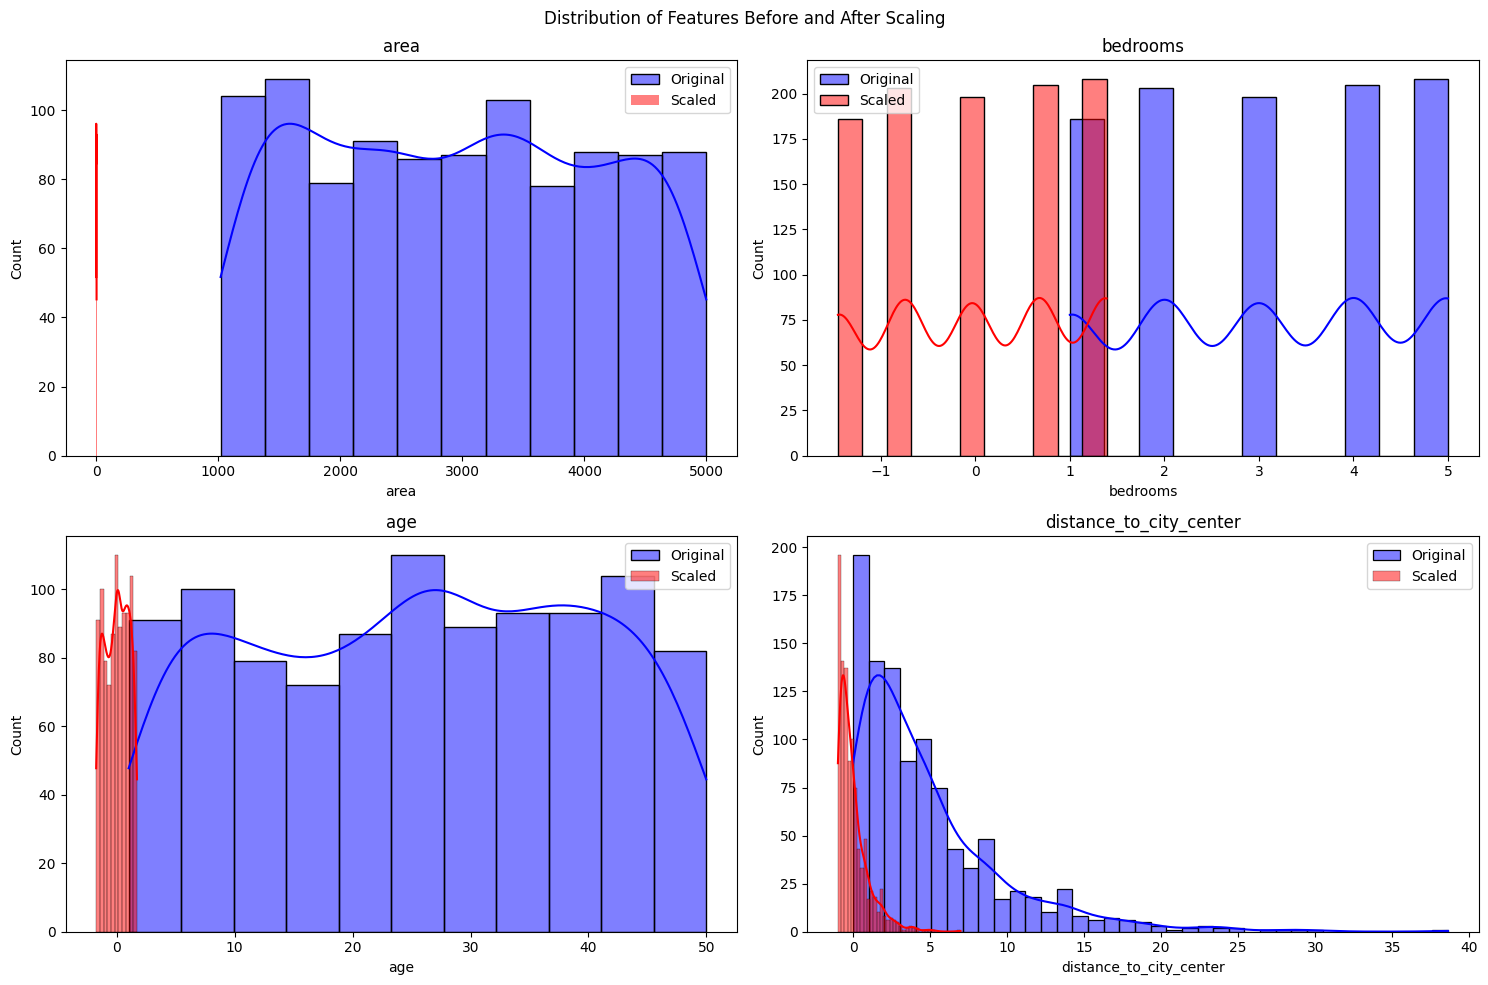


Correlation with price (original vs scaled):
                         Original    Scaled
area                     0.078197  0.078197
bedrooms                 0.150029  0.150029
age                     -0.589439 -0.589439
distance_to_city_center -0.356431 -0.356431
price                    1.000000  1.000000


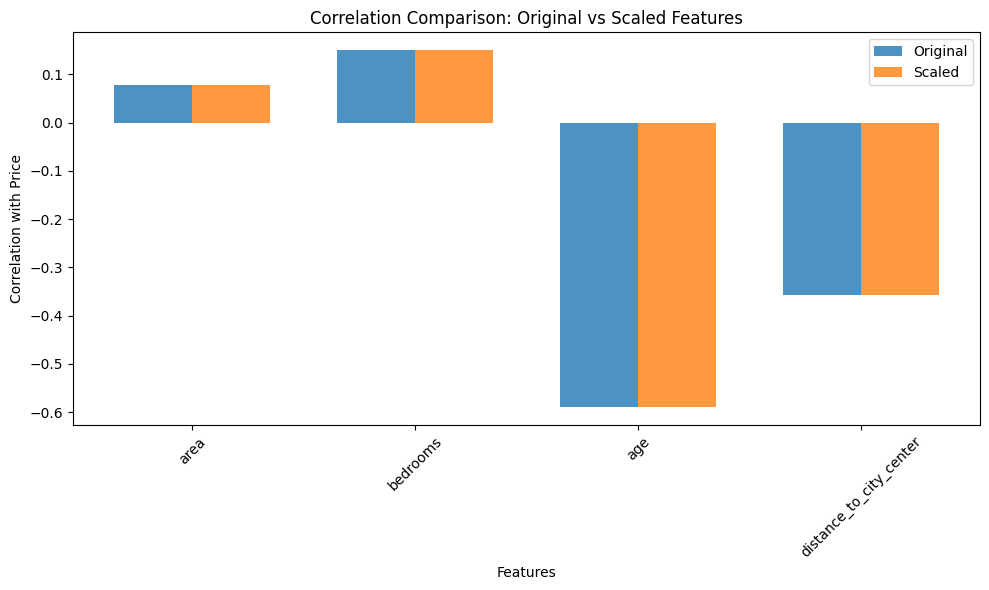

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['area', 'bedrooms', 'age', 'distance_to_city_center']

# TODO: Create an instance of StandardScaler
scaler = StandardScaler()

# TODO: Fit the scaler on the numerical features and transform them
# Hint: Use fit_transform() method
scaled_features = scaler.fit_transform(df[numerical_features])

# Create a new dataframe with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features, index=df.index)

# Add the target variable and categorical features to the scaled dataframe
df_scaled['price'] = df['price']
df_scaled['neighborhood'] = df['neighborhood']

# Display the first few rows of the original and scaled dataframes
print("Original data:")
print(df[numerical_features + ['price']].head())
print("\nScaled data:")
print(df_scaled[numerical_features + ['price']].head())

# Visualize the effect of scaling
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Features Before and After Scaling')

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i//2, i%2], color='blue', alpha=0.5, label='Original')
    sns.histplot(df_scaled[feature], kde=True, ax=axes[i//2, i%2], color='red', alpha=0.5, label='Scaled')
    axes[i//2, i%2].set_title(feature)
    axes[i//2, i%2].legend()

plt.tight_layout()
plt.show()

# TODO: Compare correlation of original and scaled features with the target variable
# Hint: Use df[numerical_features + ['price']].corr()['price'] for original
# and df_scaled[numerical_features + ['price']].corr()['price'] for scaled
original_correlation = df[numerical_features + ['price']].corr()['price']
scaled_correlation = df_scaled[numerical_features + ['price']].corr()['price']

print("\nCorrelation with price (original vs scaled):")
print(pd.DataFrame({'Original': original_correlation, 'Scaled': scaled_correlation}))

# Bonus: Visualize the correlation comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(numerical_features))

plt.bar(index, original_correlation[numerical_features], bar_width, label='Original', alpha=0.8)
plt.bar(index + bar_width, scaled_correlation[numerical_features], bar_width, label='Scaled', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.title('Correlation Comparison: Original vs Scaled Features')
plt.xticks(index + bar_width/2, numerical_features, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Exercise 6: Building a Basic sklearn Pipeline

The preceding steps - imputation, encoding, and scaling, are commonly applied in ML tasks. Because this can become cumbersome, to manage all of the different data artifacts, sklearn provides a `Pipeline` class that allows us to bundle all of these steps together along with an ML algorithm.  The `Pipeline` follows the estimator API, and can therefore be used just like any ML algorithm. `Pipeline`'s also help to avoid what is known as the 'data leakage' problem, where test data contaminates the training data.  We'll talk a bit more about data leakage later.

In this exercise, you'll create a simple sklearn Pipeline that combines preprocessing steps with a machine learning model. 

Your tasks:

- Create a pipeline that includes OneHotEncoder, StandardScaler, and a simple model (e.g., LinearRegression)
- Fit the pipeline on the training data
- Make predictions using the pipeline
- Evaluate the model's performance

Mean Squared Error: 226.65
R-squared Score: 0.90


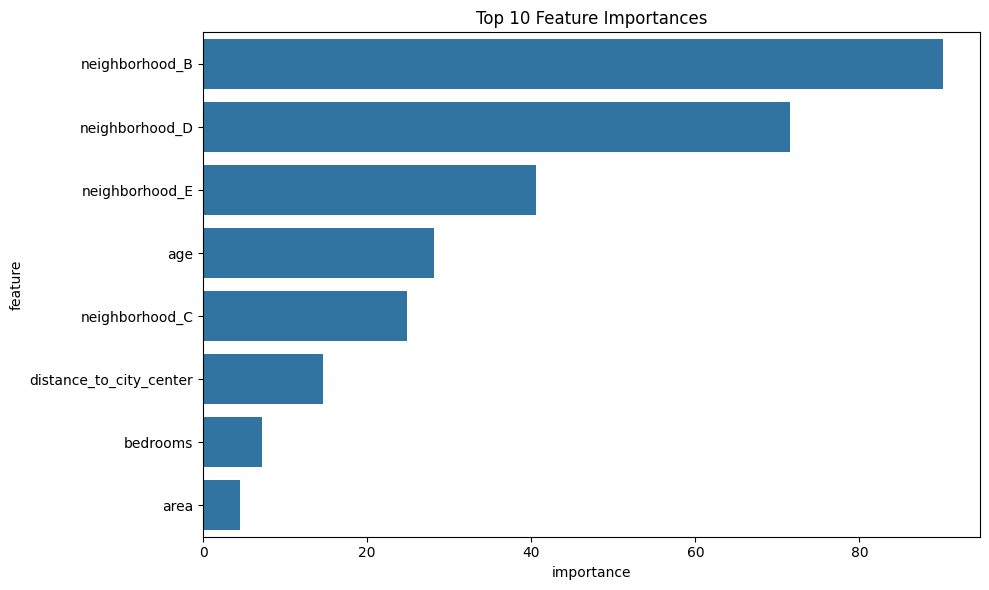

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the feature types
numeric_features = ['area', 'bedrooms', 'age', 'distance_to_city_center']
categorical_features = ['neighborhood']

# TODO: Create a ColumnTransformer for preprocessing

# First, we'll create a pipeline to do imputation / scaling on the numeric features.
# Hint: Use make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

# Second, create a pipeline for the categorical features.  Use SimpleImputer with
# the 'most frequent' strategy followed by a OneHotEncoder

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(drop="first"))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features),
        ('cat', cat_pipeline, categorical_features)
    ])

# TODO: Create a pipeline that includes the preprocessor and a LinearRegression model
# Hint: Use Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])
pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])

# TODO: Fit the pipeline on the training data
# Hint: Use the 'fit' method
# Your code here
pipeline.fit(X_train,y_train)

# TODO: Make predictions on the test data
# Hint use the 'predict' method
y_pred = pipeline.predict(X_test)

# TODO: Evaluate the model's performance
# Hint see sklearn's metrics
# See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Bonus: Feature importance analysis
# Get feature names after preprocessing
feature_names = (numeric_features + 
                 preprocessor.named_transformers_['cat']
                 .get_feature_names_out(categorical_features).tolist())

# Get coefficients from the linear regression model
coefficients = pipeline.named_steps['regressor'].coef_

# Create a dataframe of feature importances
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': abs(coefficients)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()


### Exercise 7: Cross-Validation Basics
In this exercise, you'll perform cross-validation using sklearn's cross_val_score function. Cross-validation is a crucial technique for assessing a model's performance and generalization ability.
Your tasks:

- Set up a simple pipeline with preprocessing and a model
- Perform k-fold cross-validation using cross_val_score
- Interpret the cross-validation results
- Compare cross-validation scores with the test set score

Cross-validation RMSE scores: [15.87397377 15.59647542 13.85797187 16.4530523  15.41714575]
Mean RMSE: 15.44 (+/- 1.73)
Coefficient of Variation of RMSE: -10.90%

Test set R-squared: 0.90


/var/folders/xr/kt3mj1zd5q301hfqvry58zt5q2b8fk/T/ipykernel_67921/1523443089.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(rmse_scores, labels=['RMSE'])


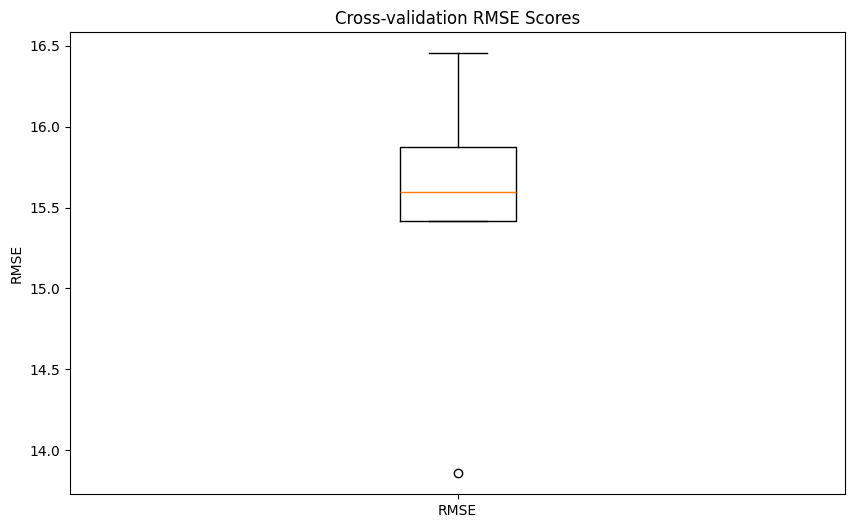

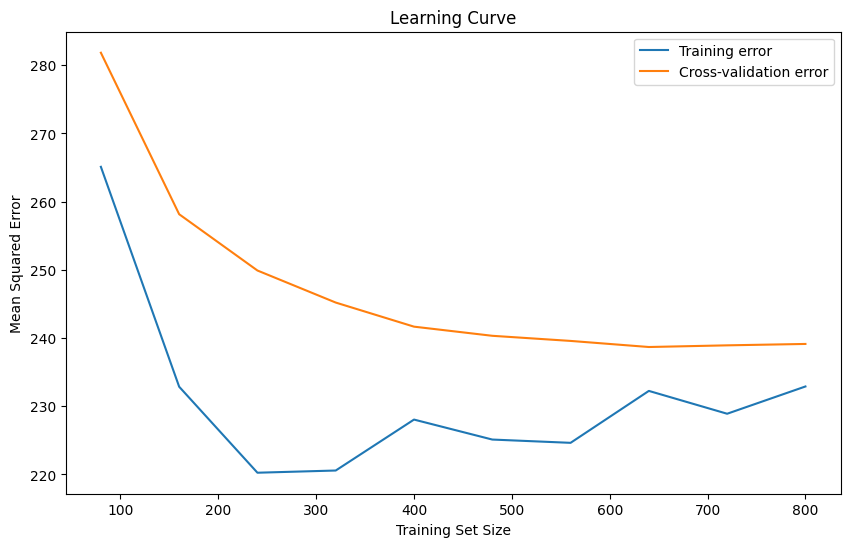

In [44]:
from sklearn.model_selection import cross_val_score


# TODO: Perform 5-fold cross-validation
# Hint: Use cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert MSE scores to positive values and calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", rmse_scores)
print(f"Mean RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

# TODO: Calculate and print the coefficient of variation (CV) of the RMSE scores
# Hint: CV = (standard deviation / mean) * 100
cv_rmse = np.std(cv_scores)/np.mean(cv_scores) * 100
print(f"Coefficient of Variation of RMSE: {cv_rmse:.2f}%")

# Compare with test set performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"\nTest set R-squared: {test_score:.2f}")

# Bonus: Visualize cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot(rmse_scores, labels=['RMSE'])
plt.title('Cross-validation RMSE Scores')
plt.ylabel('RMSE')
plt.show()

# Bonus: Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation error')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()